<a href="https://colab.research.google.com/github/TomoharuKurosu/Tomoaharu_Kurosu_2023/blob/main/%E4%BD%8F%E5%AE%85%E4%BE%A1%E6%A0%BC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#データの読み込み
df = pd.read_csv("/content/drive/MyDrive/Bostonhousedata2.csv")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 354, number of used features: 10
[LightGBM] [Info] Start training from score 22.627966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20303 (\N{CJK UNIFIED IDEOGRAPH-4F4F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23429 (\N{CJK UNIFIED IDEOGRAPH-5B85}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/li

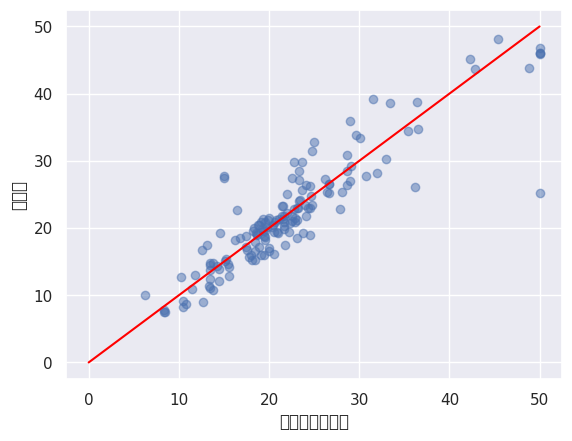

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

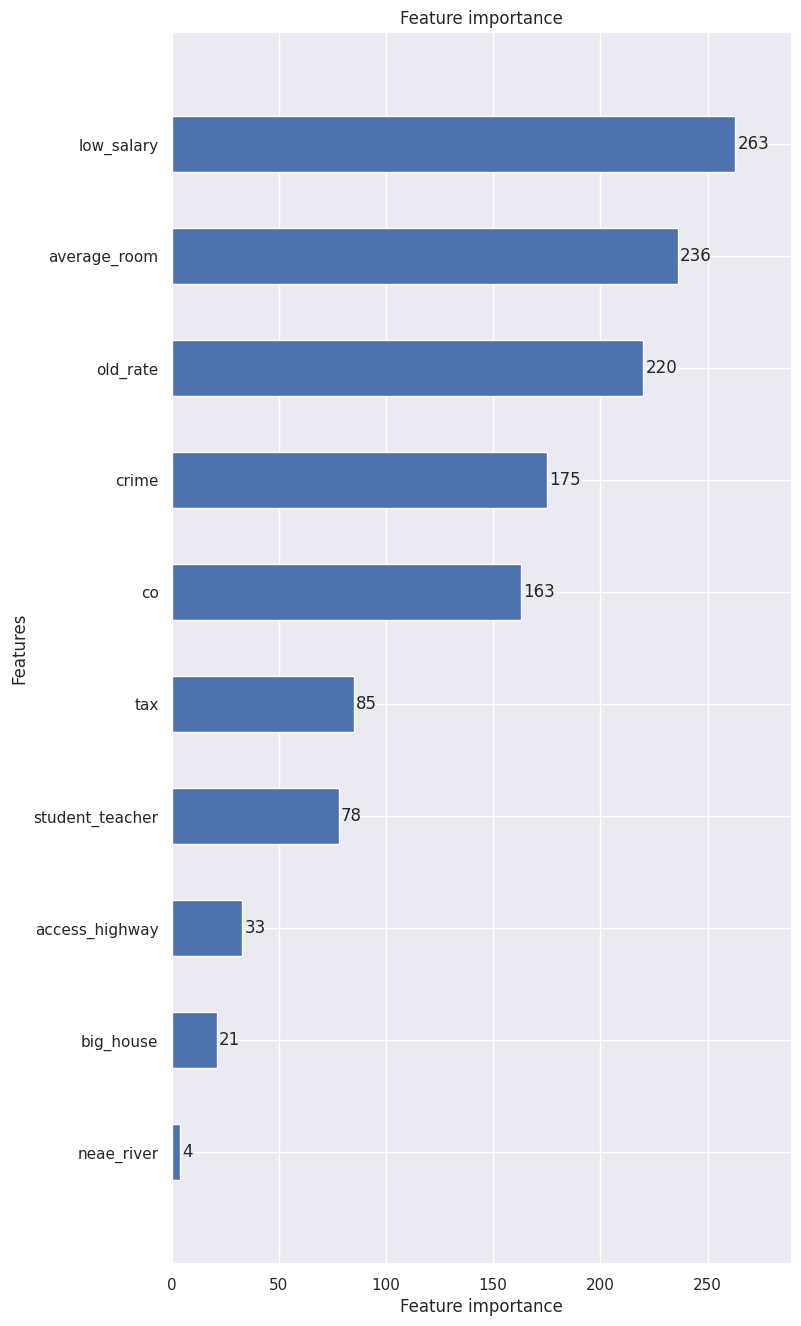

In [9]:
#必要なモジュールのインストール
!pip install LightGBM
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns


#予測ターゲットの格納（house_price：A列）
target_df = df[["house_price"]]
#特徴量の格納（説明変数：B列以降）
train_df = df.iloc[:,1:12]

#モデル学習のための、訓練データとテストデータを7:3で分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, target_df, test_size=0.3)

#XGBoostで学習するためのデータ形式に変換
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_test, y_test)

#モデルパラメータの設定
params = {'metric' : 'rmse'}
model = lgb.train(params,dtrain)

#予測の実行と書き出し
pred = model.predict(X_test)
print(pred)

#散布図で予測の精度を描写
sns.set(font=['Meiryo','Yu Gothic'])
plt.scatter(y_test, pred, alpha = 0.5)
plt.plot(np.linspace(0, 50, 100), np.linspace(0, 50, 100), "red")
plt.xlabel('実際の住宅価格')
plt.ylabel('予測値')
plt.show()

# 性能向上に寄与する度合いで重要度をプロット
lgb.plot_importance(model, height = 0.5, figsize = (8,16))

In [ ]:
#適当なデータを入れて予測（model.predict([[?,?,?,?,?,?,?,?,?,?,?,?]])）
pred = model.predict([[0.003,12.5,2,0,0.6,12,60,4,1,222,17,9]])
print(pred)

In [ ]:
#適当なデータを入れて予測（model.predict([[?,?,?,?,?,?,?,?,?,?,?,?]])）
pred = model.predict([[0.003,12.5,2,0,0.6,12,60,4,1,222,17,9]])
print(pred)